# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Итак, первые выводы, которые можно сделать:
1. Данные выглядят весьма "грязными". 
2. Видно, что много пропущенных значений в разных столбцах.
3. Типы данных для многих столбцов не совпадают с ожидаемыми.

Так как данные у нас из объявлений, составляемых людьми, то причины пропусков могут быть во много обусловлены не заполненными полями. Так же вполне вероятно влияние человеческого фактора, т.е. банальных ошибок\опечаток.


#### Описание данных
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах(м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

### Шаг 2. Предобработка данных

Начинаем предобработку данных. Пойдём прямо по столбцам, анализируя значения в них, заменяя пропуски и типы данных.
Если в каких-то столбцах первичный анализ проблем не обнажул - мы пропустим эти столбцы в данном разделе.

#### Цена на квартиры ('last_price')

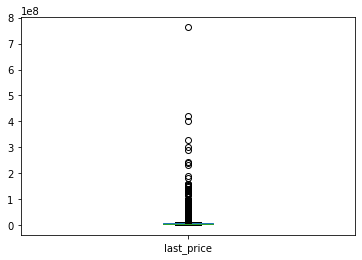

In [7]:
# со столбцом total_images вроде всё нормально.
# посмотрим на цену
data['last_price'].plot(kind='box')

Похоже, что данные о цене в целом валидны, вот только в нашей выборке есть очень дорогая недвижимость. Как правило, очень дорогие вещи, в том числе недвижимость, оценивается индивидуально. Для наших целей (изучение рыночных зависимотей) такие данные скорее внесут шум, чем будут полезны.
Посмотрим на данные о дорогих квартирах, цена от 10 млн. до 100 млн.

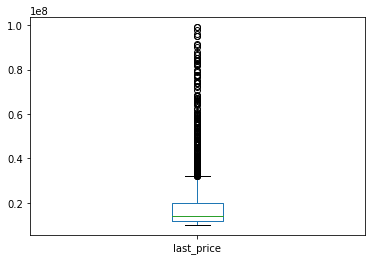

In [8]:
data.query('10000000 < last_price < 100000000').plot(y='last_price', kind='box')

Видно, что среди высокого ценового сегмента, выбросы начинаются около цены в 30 млн.
Посмотрим сколько таких дорогущих квартир.

In [9]:
data.query('last_price > 30000000').shape

(316, 22)

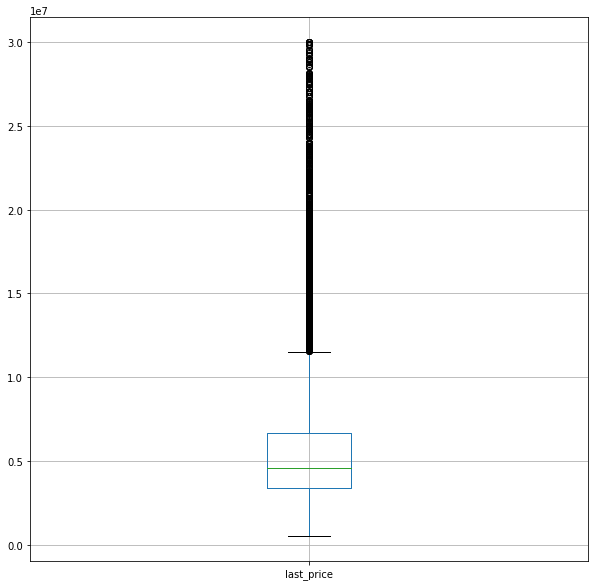

In [10]:
#всего 316 значений. Отбросим эти данные без сомнений, на итоговые выводы это повлиять не должно!
# так же отбросим цены меньше 500 000, т.к. таких цен на квартиры не бывает:)
data = data.query('500000 < last_price < 30000000')
data['last_price'].plot(kind='box', grid=True, figsize=(10,10))

Уже неплохо!
Мы видим, что основные значения у нас в районе от 3 до 7 млн. И есть несколько дорогих предложений до 30 млн.
Похоже на нормальные данные.
Продолжаем.

#### Общая площадь квартир ('total_area')

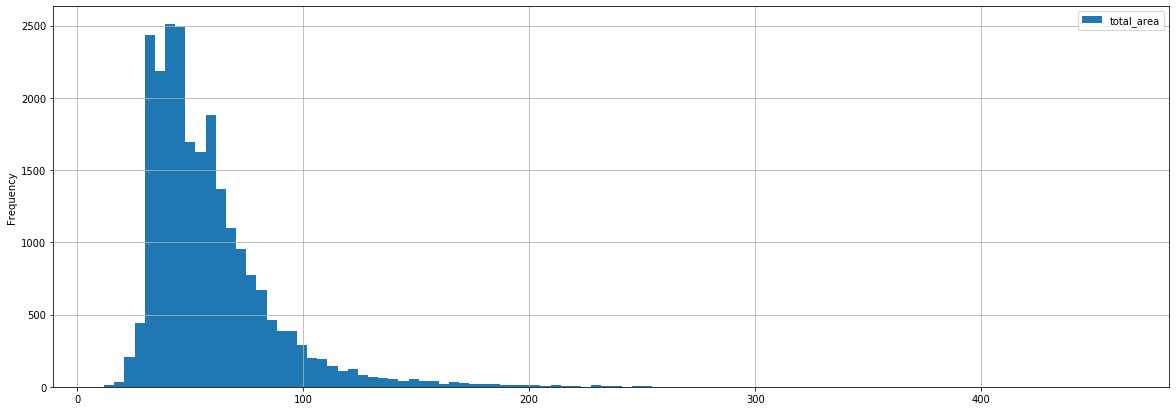

In [11]:
# посмотрим на площади квартир
data.plot(kind='hist', y='total_area', grid=True, bins=100, figsize=(20,7))

Данные выглядит неплохо. Видно, что основные данные - это квартиры до 200м2. Оно и понятно, мы же не дворцы изучаем. 
Как и в случае с ценой, исключим из исследования данные по квартирам больше чем 200 м2. В наборе их не много.

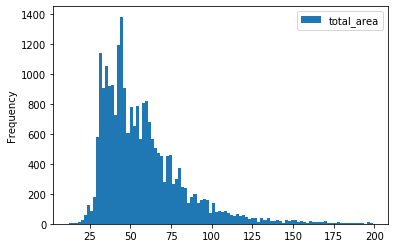

In [12]:
# делаем срез по площади меньше 200 м2
data = data.query('total_area < 200')
data.reset_index(drop=True)
data.plot(y='total_area', kind='hist', bins=100)

Вот теперь вроде нормальное распределение. Самые популярные варианты квартир с площадью от 30 до 75 кв.м. Но есть варианты более скромные, а есть и почти дворцы!

#### Время публикации объявления ('first_day_exposition')

In [13]:
# в столбце первого дня объявления, данные были не в формате времени
# переведём данные в формат времени
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#  т.к. время у нас везде 00:00:00, значения часов отбрасываются и у нас в данных только даты. То, что нужно!
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0


#### Высота потолков ('ceiling_height')

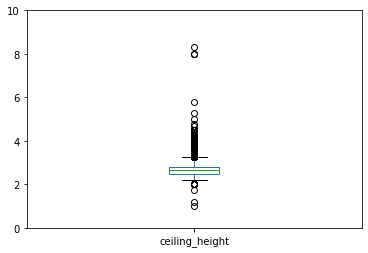

In [14]:
# в столбце 'ceiling_height' много пропущенных значений
# посмотрим на распределение значений, используя boxplot
data.plot(y='ceiling_height', kind='box', ylim=(0,10))

Видно, что большинство значений находится в пределах (2,4) метра. Однако есть некоторые значения, выходящие за пределы. В Питере, конечно, потолки высокие, но даже самые "царские дома" не имеют потолков выше 4 метров. 
Посмотрим сколько у нас таких значений и подумаем что с ними делать.

In [15]:
# проверим кол-во значений больше 4 и 5 метров
print(data.query('ceiling_height > 4')['ceiling_height'].count())
data.query('ceiling_height > 5')['ceiling_height'].count()

60


31

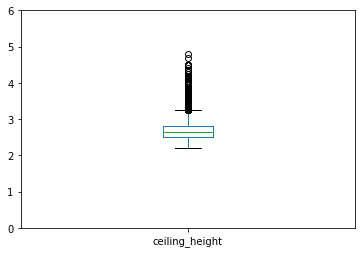

In [16]:
# таких значений не так много. Но вдруг, у нас где-то двухэтажная квартира или дворец? 
# Врядли.:) 
# Но для надёжности, отбросим только данные, где высота более 5 метров. То же самое, для потолков < 2 метров
data.loc[:, 'ceiling_height'] = data.query('5 > ceiling_height > 2').loc[:, 'ceiling_height']
data.plot(y='ceiling_height', kind='box', ylim=(0,6))

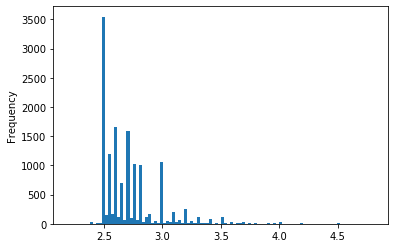

In [17]:
data['ceiling_height'].plot(kind='hist', bins=100)

Видно, что большинство данных - это какая-то старндартная величина. Здания строятся по стандартам, поэтому логично.

In [18]:
# вернемся к пропускам
data['ceiling_height'].isna().sum()

9081

Их слишком много чтобы удалить, а замена на одно значение (например медиану) может исказить распределение. 

Высота потолков - это стандартное значения для некоторой архитектурной серии зданий. Застройка у нас довольно типовая. Из наших данный серию проекта мы вытянуть не можем. Единственный параметр, к которому мы можем привязаться - это высота здания.

Поэтому заполним пропуски в высоте потолков на средние значения для каждой этажности здания.

In [19]:
# соберём свобную табличку по количеству этажей 
data_ceiling = data.pivot_table(index='floors_total', values='ceiling_height', aggfunc='mean').reset_index()
# присоединим к нашим данным
data = data.merge(data_ceiling, on='floors_total', how='left')

In [20]:
# причешем немного и заполним пропуски.
data.rename(columns={'ceiling_height_x':'ceiling_height'}, inplace=True)
data['ceiling_height'].fillna(data['ceiling_height_y'], inplace=True)

data.drop(columns='ceiling_height_y', inplace=True)

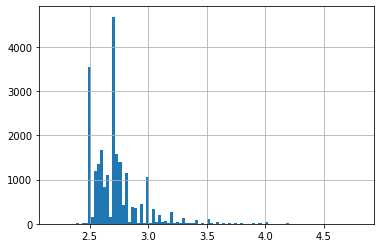

In [21]:
data['ceiling_height'].hist(bins=100)

Получше! Распределение сталоо более гладким. Но у нас появилось множество значений в районе 2.7м. В целом это нормально, т.к. это и есть стандартная современная высота потолка.

In [22]:
# глянем на оставшиеся пропуски
data['ceiling_height'].isna().sum()

78

Это пропуски, где не была указана высота здания. Разберёмся с этим в следующем разделе.

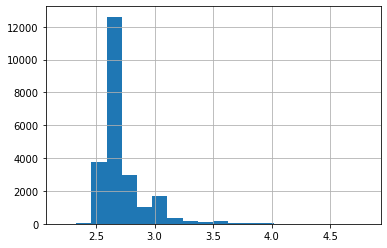

In [23]:
#ну и также, нам вполне достаточно округлить значения до дециметров (1 знак после запятой)
data['ceiling_height'] = data['ceiling_height'].round(1)
data['ceiling_height'].hist(bins=20)

Отлично!
Идём дальше по столбцам.

#### Количество этажей ('floors_total') и этаж квартиры ('floor')

In [24]:
# проверим высоту зданий на пустые значения
data['floors_total'].isna().sum()

85

In [25]:
# пустых значений не так много, а знание на каком этаже квартира(последнем или нет) нам потребуется.
# поэтому удалим строки с пропусками
data = data.dropna(subset=['floors_total'])
data.reset_index(drop=True)

#переведём к целочисленному формату
data['floors_total'] = data['floors_total'].astype('int')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.8,11,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.7,5,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
4,10,2890000.0,30.4,2018-09-10,1,2.6,12,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0


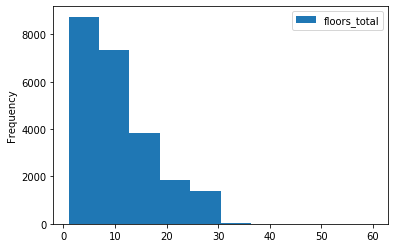

In [26]:
# визуально посмотрим на данные
data.plot(y='floors_total', kind='hist')

Вроде всё хорошо.

In [27]:
data['floor'].isna().sum()

0

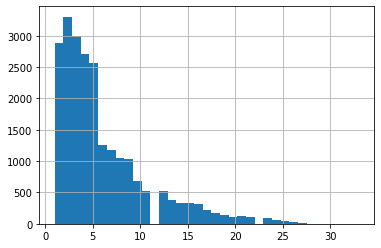

In [28]:
data['floor'].hist(bins=35)

Данные выглядят нормально. Много квартир на 1-5 этажах.

#### Жилая площадь и площадь кухни ('living_area', 'kitchen_area')

In [29]:
# посмотрим на пропуски
data['living_area'].isna().sum()

1817

Много. Скорее всего люди просто не знали (или не указали) размер жилой площади.
Просто так отбрасывать эти значения было бы не правильным. Попробуем посмотреть поглубже в наши данные.

Что же, просто не будет... 
Чтобы правильно разобраться со значениями площади квартиры, необходимо определиться, а какие данные в принципе мы ожидаем там увидеть.
В наших столбцах есть следующая информация касаемо площади:
* 'total_area' - общая площадь недвижимости
* 'living_area' - жилая прощадь
* 'kitchen_area' - площадь кухни

Если бы мы рассматривали обычную квартиру, то взаимосвязь этих параметров была бы следующая:
> total_area = living_area + kitchen_area + non_living_area 

,где non_living_area - это площадь всего нежелого пространства: санузлы, лоджии, иное. 


Также, у нас есть параметры, которые влияют на эту формулу:
* 'balcony' - количество балконов
* 'rooms' - количество комнат
* 'is_apartment' - аппартаменты (может отсутствовать жилая площадь или быть большая нежилая)
* 'studio' - квартира-студия, может отсутствовать площадь кухни
* 'open_plan' - открытая планировка, могут варироваться отношения параметров

Проанализируем влияние данных из этих столбцов друг на друга.

In [30]:
flat_cols = ['total_area', 'living_area', 'kitchen_area', 'balcony', 'rooms', 'is_apartment', 'studio', 'open_plan']
data[flat_cols].corr()

,total_area,living_area,kitchen_area,balcony,rooms,studio,open_plan
total_area,1.000000,0.924863,0.550449,0.097477,0.793319,-0.093509,-0.057669
living_area,0.924863,1.000000,0.306371,0.048127,0.876469,-0.066911,-0.039609
kitchen_area,0.550449,0.306371,1.000000,0.126497,0.179084,NaN,NaN
balcony,0.097477,0.048127,0.126497,1.000000,0.033033,0.031337,0.020880
rooms,0.793319,0.876469,0.179084,0.033033,1.000000,-0.157367,-0.096456
studio,-0.093509,-0.066911,NaN,0.031337,-0.157367,1.000000,-0.004223
open_plan,-0.057669,-0.039609,NaN,0.020880,-0.096456,-0.004223,1.000000


1. Видно сильную корреляцию общей и жилой площадей. Это понятно и ожидаемо.
2. Корреляция площади кухни с общей довольно высокая, что понятно. А вот корреляция с площадью жилой довольно маленькая. Это обяснимо тем, что корреляция может быть как прямая(больше квратира - больше площади везде), так и обратная (больше кухня - меньше места для остального). 
3. Количество комнат сильно коррелирует с общей и жилой площадью и почти не коррелирует с площадью кухни. Логично!
4. Балконы, студия и открытая планировка в целом не сильно влияют на параметры площади.

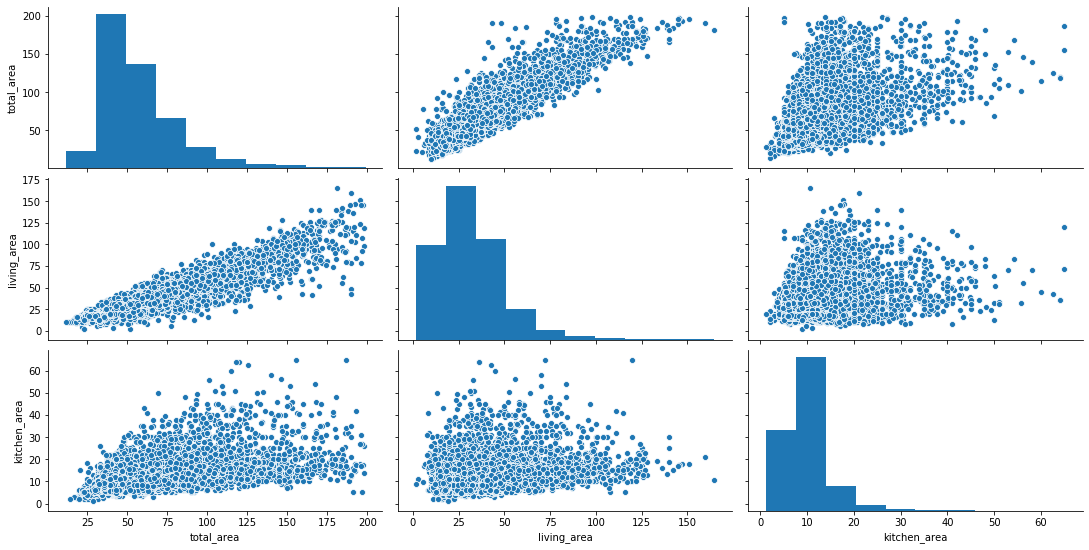

In [31]:
# глянем ещё визуально на распределение зависимости площади
pair_corr_cols = ['total_area', 'living_area', 'kitchen_area']
sns.pairplot(data[pair_corr_cols], aspect=2)

Зависимость жилой площади от общей выглядит почти линейно, поэтому мы сможем найти параметры этой зависимости и заполнить пропуски в данных.
А вот зависимость площади кухни не такая очевидная. Однако, в нашем исследовании площадь кухни не несёт критической нагрузки, а данных с пропущенными значениями < 10% от набора. Поэтому для площади кухни мы поступим так же - вычислим её значение через линейную зависимость от площади.

In [32]:
# среднее отношение жилой к общей
par_living_area = (data['living_area'] / data['total_area']).mean()
print('Коэффициент зависимости жилой площади:', par_living_area)

# среднее отношение кухни к общей
par_kitchen_area = (data['kitchen_area'] / data['total_area']).mean()
print('Коэффициент зависимости площади кухни:', par_kitchen_area)

Коэффициент зависимости жилой площади: 0.5648149635401495
Коэффициент зависимости площади кухни: 0.18812650531173808


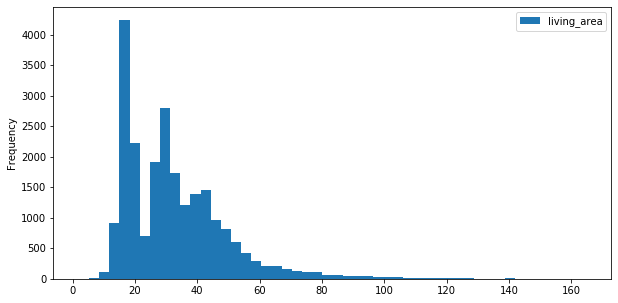

In [33]:
# посчитаем жилую площадь для пустых значений
data['living_area'].fillna((data['total_area']*par_living_area), inplace=True)

# и посмотрим на данные
data.plot(y='living_area', kind='hist', bins=50, figsize=(10,5))

Наблюдаем какой-то странный провал в значениях от 20 до 30 м2. Обяснить его сложно. Вероятно, наличие двух пиков и провала между ними связано с типовой затсройкой (а значит и метражом) квартир - почти одинаковых много, а вот промежуточных нет.
Отметим это, но зацикливаться не будем.
Займемся сразу размером кухни, раз уж мы для этого всё подготовили.

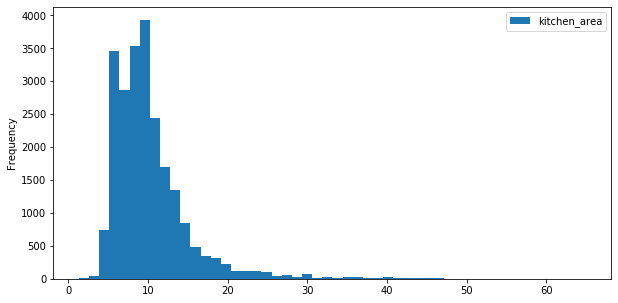

In [34]:
# посчитаем площадь кухонь для пустых значений
data['kitchen_area'] = data['kitchen_area'].fillna((data['total_area']*par_kitchen_area))

# и посмотрим на данные
data.plot(y='kitchen_area', kind='hist', bins=50, figsize=(10,5))

Вроде неплохо.

In [35]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.8,11,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.7,5,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
4,10,2890000.0,30.4,2018-09-10,1,2.6,12,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0


#### Аппартаменты ('is_apartment'), студии ('studio'), открытая планировка ('open_plan')

In [36]:
# посмотрим что там по аппартаментам
data['is_apartment'].value_counts()

False    2683
True       43
Name: is_apartment, dtype: int64

Всего 43 аппартамента, остальные либо нет, либо неизвестно. Можно предположить, что если продаваемая недвижимость является аппартаментами - это достаточно важное обстоятельство, которое должно быть указано в обявлении. Т.е. не указанные значения, это по сути False.
Но если мы заменим все отсуствующие значения на False, это не изменит особо картины, т.к. значений с True ооочень мало.

Также, данные в этом столбце типа str. Хотя должен быть bool. Так что пропуски данных могут быть связаны и с ошибкой выгрузки.

Однако, чтобы всё было красиво, мы всё-таки заменим пропуски на False и приведём к булеву типу.

In [37]:
data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'] = data['is_apartment'].astype(bool)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23175 entries, 0 to 23259
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23175 non-null  int64         
 1   last_price            23175 non-null  float64       
 2   total_area            23175 non-null  float64       
 3   first_day_exposition  23175 non-null  datetime64[ns]
 4   rooms                 23175 non-null  int64         
 5   ceiling_height        23173 non-null  float64       
 6   floors_total          23175 non-null  int32         
 7   living_area           23175 non-null  float64       
 8   floor                 23175 non-null  int64         
 9   is_apartment          23175 non-null  bool          
 10  studio                23175 non-null  bool          
 11  open_plan             23175 non-null  bool          
 12  kitchen_area          23175 non-null  float64       
 13  balcony         

Данные по студиям и открытой планировке выглядят валидно. Посмотрим на значения в столбцах.

In [39]:
data['studio'].value_counts()

False    23029
True       146
Name: studio, dtype: int64

In [40]:
data['open_plan'].value_counts()

False    23110
True        65
Name: open_plan, dtype: int64

Похоже на нормальные данные.

#### Балконы ('balcony')

In [41]:
print(data['balcony'].value_counts())
print()
data['balcony'].isna().sum()

1.0    4113
2.0    3635
0.0    3626
5.0     298
4.0     172
3.0      77
Name: balcony, dtype: int64



11254

Данные в заполненных ячейках вроде нормальные (кроме типа float, который должен быть int). Но много пропусков. Вероятно, если люди не указывали количество балконов, значих их нет.
Заменим пропуски на 0 и приведём к целочисленному типу.

In [42]:
data['balcony'].fillna(0, inplace=True)
data['balcony'] = data['balcony'].astype(int)

In [43]:
data['balcony'].value_counts()

0    14880
1     4113
2     3635
5      298
4      172
3       77
Name: balcony, dtype: int64

#### Населённый пункт ('locality_name')

In [44]:
# посмотрим на пропуски
data['locality_name'].isna().sum()

48

In [45]:
# посмотрим на значения и их количество
print(len(data['locality_name'].unique()))

print(data['locality_name'].unique())

361
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый

Населённых пунктов много, а значений с пропусками не так много. Отбросим строки с пропусками.

In [46]:
data.dropna(subset=['locality_name'], inplace=True)
data.reset_index(drop=True, inplace=True)

#### Ближайшие аэропорты ('airports_nearest')

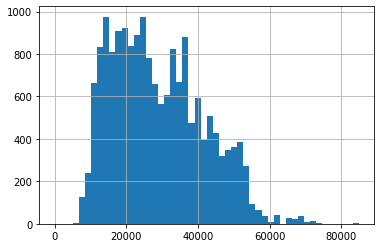

In [47]:
data['airports_nearest'].hist(bins=50)

In [48]:
data['airports_nearest'].isna().sum()

5493

Не многие знают расстояние до аэропорта от своего дома... 
Посмотрим, в каких населённых пунктах не указывали эти данные?

In [49]:
data_no_airport = data[data['airports_nearest'].isna()]
data[data['airports_nearest'].isna()]['locality_name'].value_counts().head(20)

посёлок Мурино             520
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  141
Кириши                     125
Волхов                     111
Сланцы                     107
Кингисепп                  104
Тосно                      104
Никольское                  93
Коммунар                    89
Сосновый Бор                87
Кировск                     84
Отрадное                    80
Санкт-Петербург             72
посёлок Бугры               68
Name: locality_name, dtype: int64

Никто в Мурино не знает сколько до А\П? 

Проверим! 

Построим словарик со средними значениями расстояния от населённого пункта до объектов, исходя из данных в других объявлениях.

In [50]:
# строим сводную таблицу
data_locality_group = (
    data
    .dropna(subset=['airports_nearest'])
    .pivot_table(index='locality_name', values=('airports_nearest', 'cityCenters_nearest'), aggfunc='mean')
    .reset_index()
)

data_locality_group.columns = ['locality_name', 'airports_nearest_mean', 'cityCenters_nearest_mean']
data_locality_group

,locality_name,airports_nearest_mean,cityCenters_nearest_mean
0,Зеленогорск,73300.250000,54617.583333
1,Колпино,26370.000000,32107.764881
2,Красное Село,26623.738372,30048.453488
3,Кронштадт,67469.263158,49195.726316
4,Ломоносов,48308.280303,50739.969697
5,Павловск,21053.342105,33206.921053
6,Петергоф,40190.635000,35475.360000
7,Пушкин,16442.722527,28742.195592
8,Санкт-Петербург,28074.310222,11746.619917
9,Сестрорецк,56640.774725,34630.565934


Действительно никто не знает. 
Если проверить, то и по расстоянию до центра для этих населенных пунктов информации нет. Скорее всего, при выгрузке данные именно по этим посёлкам были утеряны, либо их не было вовсе.


Но мы можем спасти почти 2000 строк, используя наш словарик расстояний, добавив в него нужную информацию из Яндекс.Карт!

In [51]:
# создадим фрейм с данными для топ-5 поселков с пропущенными значениями. Данные возьмём из карт.
missed_locality={
    'locality_name': ['посёлок Мурино', 'Всеволожск', 'Гатчина', 'деревня Кудрово', 'Выборг'],
    'airports_nearest_mean': [30000, 31000, 27000, 18000, 60000],
    'cityCenters_nearest_mean': [15000, 18000, 43000, 8600, 4000]
}

# создадим фрейм с данными
data_missed_locality = pd.DataFrame(missed_locality)

# добавим данные в наш словарь средних расстояний
data_locality_group = data_locality_group.append(data_missed_locality, ignore_index=True)
data_locality_group

,locality_name,airports_nearest_mean,cityCenters_nearest_mean
0,Зеленогорск,73300.250000,54617.583333
1,Колпино,26370.000000,32107.764881
2,Красное Село,26623.738372,30048.453488
3,Кронштадт,67469.263158,49195.726316
4,Ломоносов,48308.280303,50739.969697
5,Павловск,21053.342105,33206.921053
6,Петергоф,40190.635000,35475.360000
7,Пушкин,16442.722527,28742.195592
8,Санкт-Петербург,28074.310222,11746.619917
9,Сестрорецк,56640.774725,34630.565934


In [52]:
# присоединим данные из словаря к нашей таблице
data = data.merge(data_locality_group, how='left', on='locality_name')

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23127 entries, 0 to 23126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              23127 non-null  int64         
 1   last_price                23127 non-null  float64       
 2   total_area                23127 non-null  float64       
 3   first_day_exposition      23127 non-null  datetime64[ns]
 4   rooms                     23127 non-null  int64         
 5   ceiling_height            23125 non-null  float64       
 6   floors_total              23127 non-null  int32         
 7   living_area               23127 non-null  float64       
 8   floor                     23127 non-null  int64         
 9   is_apartment              23127 non-null  bool          
 10  studio                    23127 non-null  bool          
 11  open_plan                 23127 non-null  bool          
 12  kitchen_area      

In [54]:
# заполним пропуски в данных изначального столбца на данные из среднего.
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest_mean'])

# Я сам удивлён, что этот код работает!

In [55]:
# то же самое для центра города
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest_mean']).round(0)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23127 entries, 0 to 23126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              23127 non-null  int64         
 1   last_price                23127 non-null  float64       
 2   total_area                23127 non-null  float64       
 3   first_day_exposition      23127 non-null  datetime64[ns]
 4   rooms                     23127 non-null  int64         
 5   ceiling_height            23125 non-null  float64       
 6   floors_total              23127 non-null  int32         
 7   living_area               23127 non-null  float64       
 8   floor                     23127 non-null  int64         
 9   is_apartment              23127 non-null  bool          
 10  studio                    23127 non-null  bool          
 11  open_plan                 23127 non-null  bool          
 12  kitchen_area      

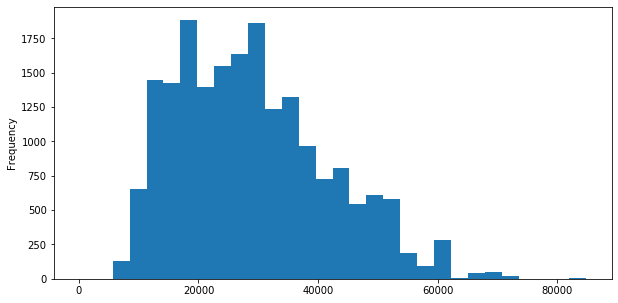

In [57]:
data['airports_nearest'].plot(kind='hist', bins=30, figsize=(10,5))

Вроде данные выглядят нормально. Пики - это внесённые нами усреднённые значения по отсутствующим данным. Выглядит немного не красиво, но распределение выглядит логично, явных аномалий нет.

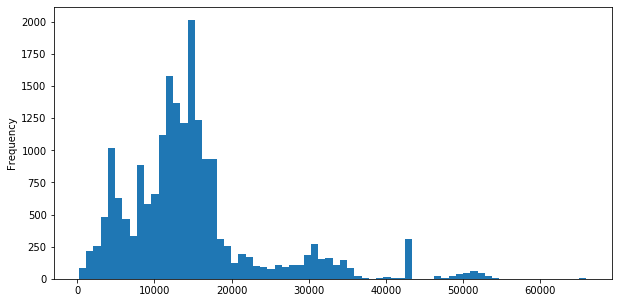

In [58]:
data['cityCenters_nearest'].plot(kind='hist', bins=70, figsize=(10,5))

Интересно, как выделяются районы и города по удалённости от центра. 

Есть даже значения больше 60км. Но мы их оставим, ленинградская область - большая!

Остальные пустые значения в столбцах 'airport_nearest' и 'cityCenter_nearest' мы оставим пустыми.

#### Парки 'parks_around3000' и 'parks_nearest'

In [59]:
data['parks_around3000'].value_counts()

0.0    9927
1.0    5532
2.0    1633
3.0     563
Name: parks_around3000, dtype: int64

In [60]:
data['parks_around3000'].isna().sum()

5472

Значения столбца хорошие. Не указанные значения считаем отсуствие парка, т.е. заменим на 0. Ну и сделаем целым числом.

In [61]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)

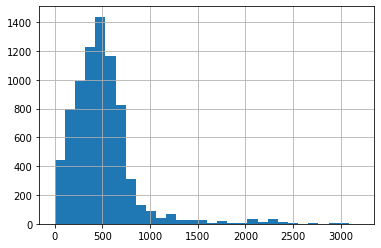

In [62]:
# взглянем на расстояние до ближайшего парка
data['parks_nearest'].hist(bins=30)

In [63]:
#проверим, есть ли записи, где парки есть, а расстояние не указано
data.query('(parks_around3000 != 0) & (parks_nearest.isna())', engine='python')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports_nearest_mean,cityCenters_nearest_mean


Оставим тогда пропуски в покое. Ну нет там парков поблизости и ладно.

#### Пруды 'ponds_around3000', 'ponds_nearest'

С прудами поступаем аналогично паркам.

In [64]:
data['ponds_around3000'].value_counts()

0.0    8930
1.0    5549
2.0    1809
3.0    1367
Name: ponds_around3000, dtype: int64

In [65]:
data['ponds_around3000'].isna().sum()

5472

In [66]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)

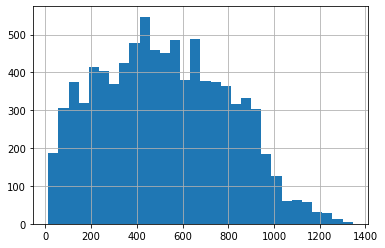

In [67]:
# взглянем на расстояние до ближайшего парка
data['ponds_nearest'].hist(bins=30)

In [68]:
data['ponds_nearest'].isna().sum()

14402

Данных не много, хотя прудов в питере хватает. Возможно, люди не считают важным указывать такие параметры в объявлении, может просто ленятся:) 
Заполнить нам эти данные нечем. Оставим как есть.

#### Срок публикации объявления 'days_exposition'

In [69]:
data['days_exposition'].isna().sum()

3067

Отсутствующие значения вероятно связаны с тем, что объявление на момент выгрузки ещё было активно. Не будем трогать эти данные.

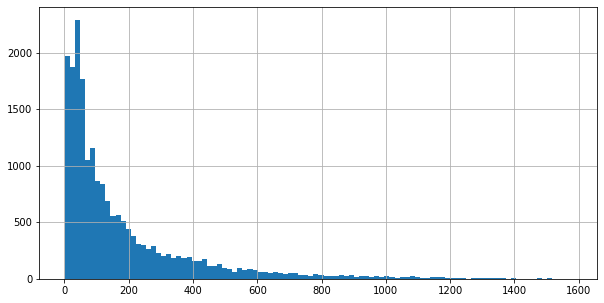

In [70]:
data['days_exposition'].hist(bins=100, figsize=(10,5))

Распределение нормально. Видно, что большинство квартир продаётся за первые месяцы. Но есть и те, которые продаются годами.
Такие большие сроки могут быть обусловлены тем, что объявление долго не закрывалось, даже если квартира уже была продана.
Глянем на коробку с усами.

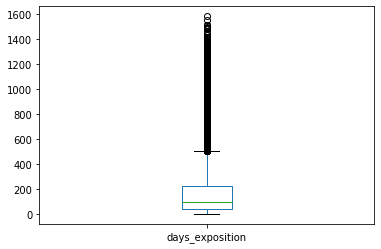

In [71]:
data['days_exposition'].plot(kind='box')

В целом, можно сказать, что продажа больше года - это уже очень долго. Цены на недвижимость меняются, объявление уже не актуально. Для нас же актуальность важна, поэтому мы отрежем объявления, которые попали в выбросы. 
Для удобства, возьмём только те объявления, которые продались за 2 года (730 дней). Остальные заменим на пустые значения.

In [72]:
data.loc[data['days_exposition'] > 730, 'days_exposition'] = np.nan

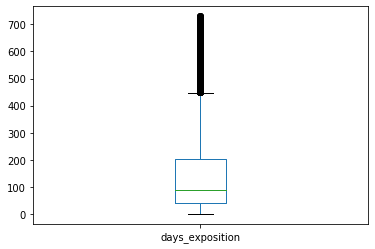

In [73]:
data['days_exposition'].plot(kind='box')

Ну вот! И данные не потеряли, и актуальность (на тот момент, по крайней мере) подчистили.

In [74]:
# скинем рабочие колонки и посмотрим ещё раз на инфу
del data['airports_nearest_mean']
del data['cityCenters_nearest_mean']
data.reset_index()

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23127 entries, 0 to 23126
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23127 non-null  int64         
 1   last_price            23127 non-null  float64       
 2   total_area            23127 non-null  float64       
 3   first_day_exposition  23127 non-null  datetime64[ns]
 4   rooms                 23127 non-null  int64         
 5   ceiling_height        23125 non-null  float64       
 6   floors_total          23127 non-null  int32         
 7   living_area           23127 non-null  float64       
 8   floor                 23127 non-null  int64         
 9   is_apartment          23127 non-null  bool          
 10  studio                23127 non-null  bool          
 11  open_plan             23127 non-null  bool          
 12  kitchen_area          23127 non-null  float64       
 13  balcony         

### Выводы
Мы провели предобработку данных.
1. Пропуски в данных были обнаружены, сделаны гипотезы об их происхождении. Большинство, вероятно, связано с неполным составлением объявлений изначально. Где это было возможно, мы дополнили данные на основе известных параметров.

2. Данные в таблице были отформатированы.

3. Был проведён анализ распределения значений данных. На его основе сформированы выводы, часть значений нормирована.

В целом данные готовы для дальнейшего анализа. 

В некоторых столбцах остались пропущенные значения, но заполнить их валидными данными не возможно.

In [75]:
### Пошаманил над потолками. По остальным пунктам - спасибо, учту!

### Шаг 3. Посчитайте и добавьте в таблицу

цену квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.


#### Цена квадратного метра

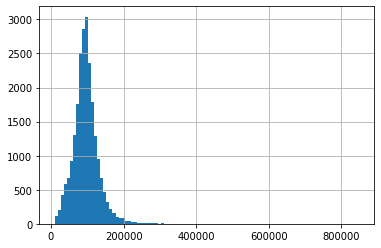

In [76]:
data['meter_price'] = (data['last_price'] / data['total_area']).round(2)
data['meter_price'].hist(bins=100)

Отличное распределение! Вот только есть значения очень большой цены\кв.м. Это достаточно хороший сигнал о том, что данные о цене могут быть не валидны, что в последствии приведёт к выбросам.
Мы очистим наши данные от тех значений, где выявлена слишком высокая цена кв.м. (больше 350000)

In [77]:
data = data.query('meter_price < 350000')

#### День недели, месяц и год публикации объявления

In [78]:
data['exp_weekday'] = data['first_day_exposition'].dt.weekday

In [79]:
data['exp_month'] = data['first_day_exposition'].dt.month

In [80]:
data['exp_year'] = data['first_day_exposition'].dt.year

Готово!

#### Этаж квартиры. Варианты — первый, последний, другой.

In [81]:
# напишем функцию, которая посчитает нам нужные значения и вернёт варианты
def floor_place(row):
    top_floor = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'Первый'
    if floor == top_floor:
        return 'Последний'
    return 'Другой'

In [82]:
data['floor_place'] = data.apply(floor_place, axis=1)

In [83]:
data['floor_place'].value_counts()

Другой       17012
Последний     3224
Первый        2881
Name: floor_place, dtype: int64

#### Соотношение жилой и общей площади, а также отношение площади кухни к общей

In [84]:
data['living_total_ratio'] = (data['living_area'] / data['total_area']).round(3)

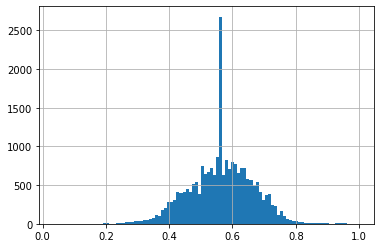

In [85]:
data['living_total_ratio'].hist(bins=100)

In [86]:
data['kitchen_total_ratio'] = (data['kitchen_area'] / data['total_area']).round(3)

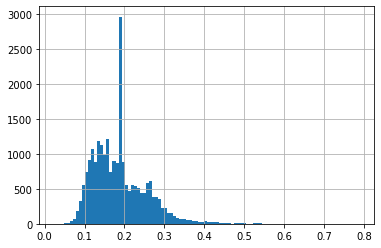

In [87]:
data['kitchen_total_ratio'].hist(bins=100)

Пиковые значения на гистограммах - это нормированные нами пропущенные значения, из раздела предобработки данных.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [89]:
# про автоматизацию графиков - СПАСИБО!! Я даже не подумал, что так можно сделать!
# где смог - заменил на функции и использую циклы. В дальнейшем буду так делать постоянно!

def price_scatter(col):
    plot = data.plot(kind='scatter', y='last_price', x=col, figsize=(15,10), grid=True)
    return plot

#### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Зависимость цены от общей площади недвижимости:

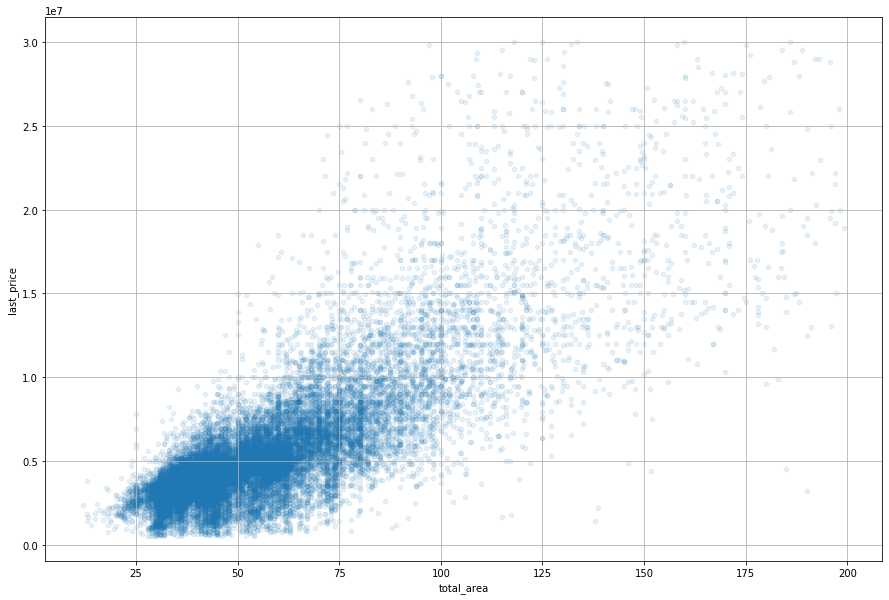

In [90]:
data.plot(x='total_area', y='last_price', kind='scatter',alpha=0.1, figsize=(15,10), grid=True)

Зависимость прослеживается. Видна зона основной массы объявлений, и рост цены по мере роста площади. Есть единичные странные объявления-выбросы, но мы их наблюдали и в гистограмме цены квадратного метра. 

Зависимость цены от числа комнат

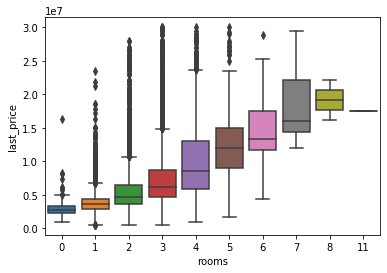

In [91]:
# будем использовать seaborn, т.к. там проще строить несколько boxplot
ax = sns.boxplot(data=data, y="last_price", x="rooms", orient="v")

Зависимость цены от числа комнат очевидна))

Зависимость от удалённости от центра:

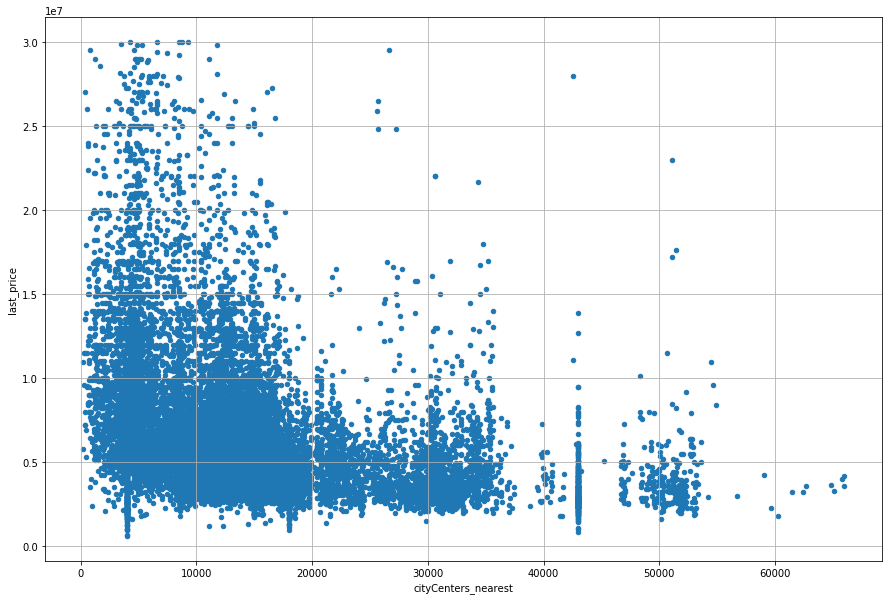

In [92]:
price_scatter('cityCenters_nearest')

График не очень наглядный, но в целом зависимость тоже видна. В районе 10км от центра достаточно много объявлений c высокой ценой. С удалением их становится меньше. 

Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом

(0, 15000000)

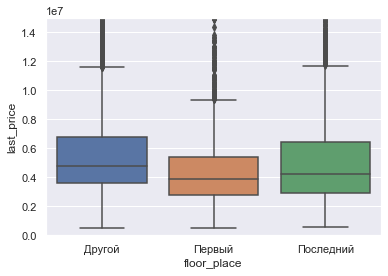

In [93]:
sns.set(style = 'darkgrid')
ax = sns.boxplot(data=data, y="last_price", x="floor_place", orient="v")

#ограничим значения по y, чтобы лучше разглядеть боксы
ax.set_ylim([0, 15000000])

Кажется, будто первый этаж действительно ценится меньше. А про последний однозначно сказать нельзя - медианное значение ниже "Других", но общее распределение примерно одинаковое. 

Зависимость от даты размещения: дня недели, месяца и года.

In [94]:
# функция агррегации по столбцу и подсчёт средней цены с выводом на линии
def price_corr_line(col):
    data_group = data.pivot_table(index=col, values='last_price', aggfunc='median').reset_index()
    plot = data_group.plot(x=col, y='last_price', kind='line', figsize=(10,5))
    return plot

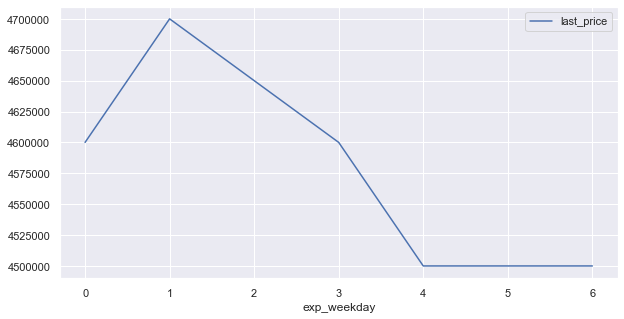

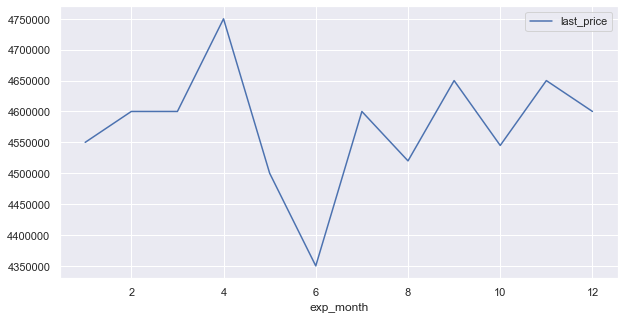

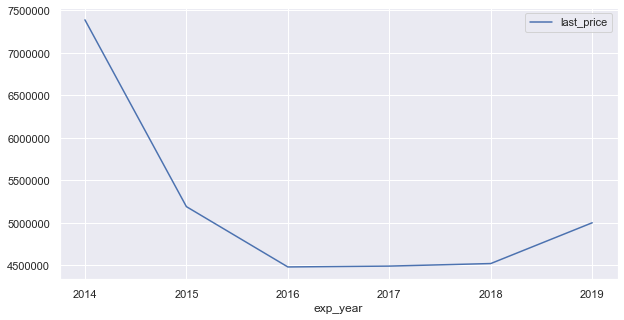

In [95]:
# посмотрим на графики зависимости цены от дня, месяца и года публикации объявления
price_corr_list=['exp_weekday', 'exp_month', 'exp_year']
for each in price_corr_list:
    price_corr_line(each)

Интересно! Во вторник публикуют более дорогие объявления. И в целом, на буднях более дорогие объявления, а в пятницу и выходные цены выставляют ниже.

Самый "дорогой" месяц - апрель. А наиболее низкие цены в июне. 
Видно, как цены падают в мае, июне. Интересно, с чем это связано? Может с праздниками? А может с планированием отпусков(деньги нужны).

С годами мы видим падение цен на жильё. Ясно виден кризис 2014 года. Цена начали подниматься только в 2019 году.

Теперь посмотрим на численную корреляцию параметров и цены.

In [96]:
# посмотрим на корреляцию цены и других значений
price_corr = data.corr()['last_price'].sort_values(ascending=False)
price_corr

last_price             1.000000
total_area             0.789608
living_area            0.682154
meter_price            0.679448
kitchen_area           0.619562
rooms                  0.498638
ceiling_height         0.405835
ponds_around3000       0.297364
parks_around3000       0.281171
total_images           0.158802
days_exposition        0.106924
floors_total           0.084062
floor                  0.083338
parks_nearest          0.042774
balcony                0.035985
is_apartment           0.013863
living_total_ratio     0.009763
exp_month              0.005503
exp_weekday           -0.022677
exp_year              -0.033248
open_plan             -0.035968
airports_nearest      -0.048395
studio                -0.053411
kitchen_total_ratio   -0.097313
ponds_nearest         -0.107000
cityCenters_nearest   -0.329430
Name: last_price, dtype: float64

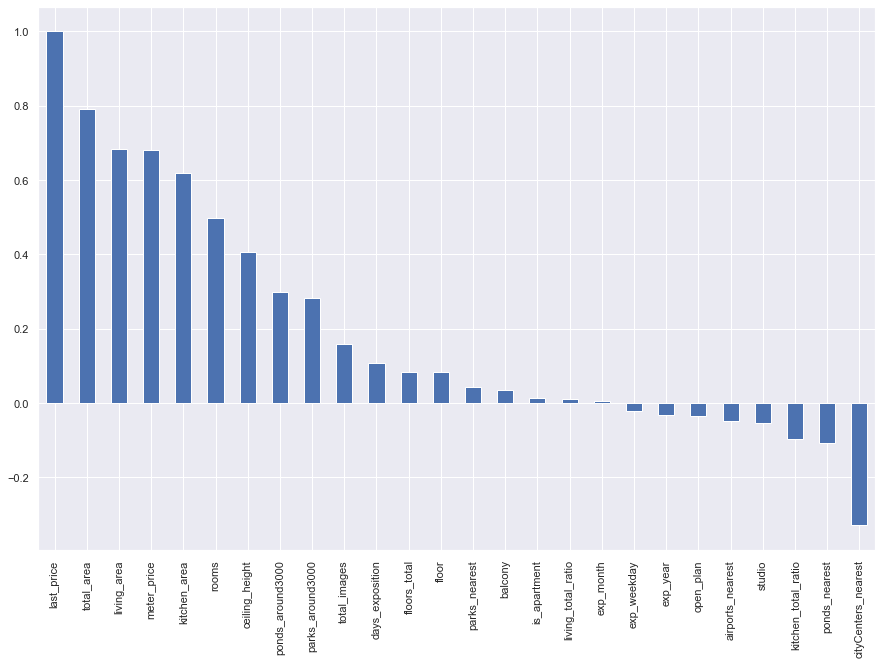

In [97]:
# построим график
price_corr.plot(kind='bar', figsize=(15,10))

Что мы видим.
1. Высокая корреляция цены с площадью(общей, жилой, кухни) очевидна. Как и с количеством комнат.
2. Видно высокую корреляцию цены и высоты потолков!
3. Также видно зависимость цены от количества парков и прудов вокруг.
4. Обратная зависимость цены наиболее высокая от расстояния до центра.

#### Вывод
Мы изучили зависимость цены от разных параметров. 

1. Наиболее высокая зависимость цены от площади недвижимости - общей, жилой, кухни.
2. Выявлена высокая зависимость цены от высоты потолков.
3. Также выявлена зависимость цены от наличия парков и прудов поблизости, а также отдалённости от центра города.

#### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [99]:
# создадим список населённых пунктов через сводную таблицу
locality_top = (
    data
    .pivot_table(index='locality_name', values='last_price', aggfunc=('count', 'mean'))
    .sort_values(by='count', ascending=False)
    .head(10)
    .reset_index()
)

In [100]:
locality_top

,locality_name,count,mean
0,Санкт-Петербург,15236,6.783628e+06
1,посёлок Мурино,520,3.671211e+06
2,посёлок Шушары,439,4.109809e+06
3,Всеволожск,397,3.737119e+06
4,Пушкин,364,6.153453e+06
5,Колпино,337,3.866289e+06
6,посёлок Парголово,326,4.477609e+06
7,Гатчина,307,3.488337e+06
8,деревня Кудрово,299,4.234158e+06
9,Выборг,237,3.250983e+06


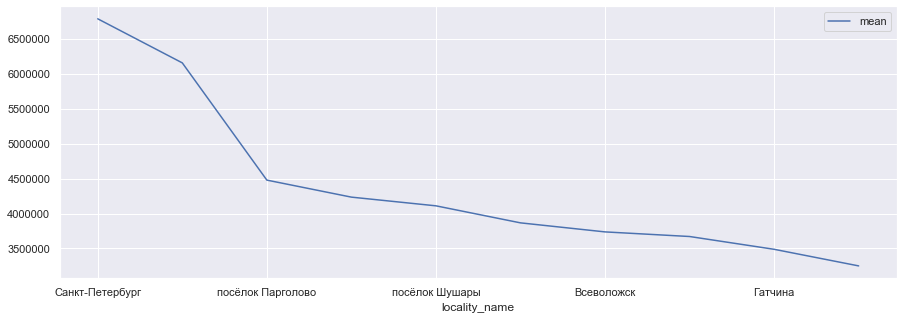

In [101]:
locality_top.sort_values('mean', ascending=False).plot(x='locality_name', y='mean', kind='line', figsize=(15,5))

In [102]:
# возьмём array из списка городов топ-листа
locality_top_list = locality_top['locality_name']
locality_top_list

0      Санкт-Петербург
1       посёлок Мурино
2       посёлок Шушары
3           Всеволожск
4               Пушкин
5              Колпино
6    посёлок Парголово
7              Гатчина
8      деревня Кудрово
9               Выборг
Name: locality_name, dtype: object

In [103]:
# соберем данные только по городам из топ-списка
data_local_top = data.query('locality_name in @locality_top_list')

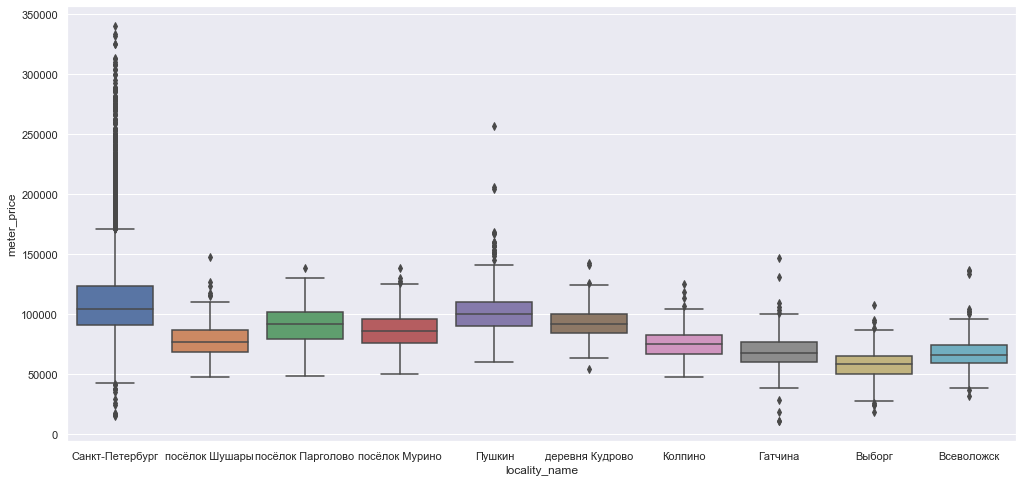

In [104]:
# Посмотрим на распределение цен за квадратный метр
plt.figure(figsize=(17,8))
ax = sns.boxplot(data=data_local_top, y="meter_price", x="locality_name", orient="v")

#### Выводы:
Видно, что самый дорогой город для проживания - северная столица. Но и цены в Пушкине тоже высоки!
Самое дешёвое жильё в Выборге.

#### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [105]:
# возьмём данные только по СПб
data_spb = data.query('locality_name == "Санкт-Петербург"')

In [106]:
# создадим колонку с расстоянием до центра в километрах
data_spb['center_km'] = (data_spb['cityCenters_nearest']/1000).round(0).astype('int')

In [107]:
# создадим сводную таблицу по расстаянию в км.
spb_center_price = data_spb.pivot_table(index='center_km', values='last_price', aggfunc='mean').reset_index()

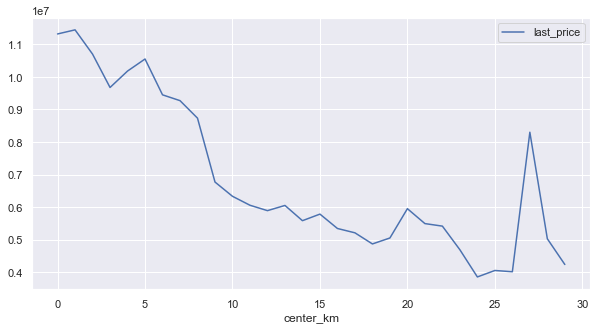

In [108]:
spb_center_price.sort_values('center_km', ascending=True).plot(x='center_km', y='last_price', kind='line', figsize=(10,5))

График выглядит в целом нормально. Центральная зона - это зона примерно до 7 км. После этого идёт сильное падение цен.

Также можно видеть всплеск цены в районе 27 км. Интересно, что там? Элитный район? Или ошибочные данные? Возможно и то и другое, но на результаты наших выводов это не влияет:)

#### Вывод:
Мы выделили зону центра в Санкт-Петербурге, на основе данных о стоимости жилья. Получилась зона ~7 км.

#### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [109]:
# сделаем выборку по квартирам в центре
data_spb_center = data_spb.query('center_km < 7')

Просто так изучать данные не интересно. Интересно сразу смотреть на них в сравнении с общими по городу!

In [110]:
# напишем функцию, которую берёт на вход столбец 
# и строит красивые диагарммы распределения для выборки из центра и в целом по городу
def plot_center_change(col, nbins=30):
    plt.figure(figsize=(17,8))
    sns.distplot(data_spb[col], bins=nbins, label='Town overall')
    sns.distplot(data_spb_center[col], bins=nbins, label='Center')
    plt.legend()
    plt.show()

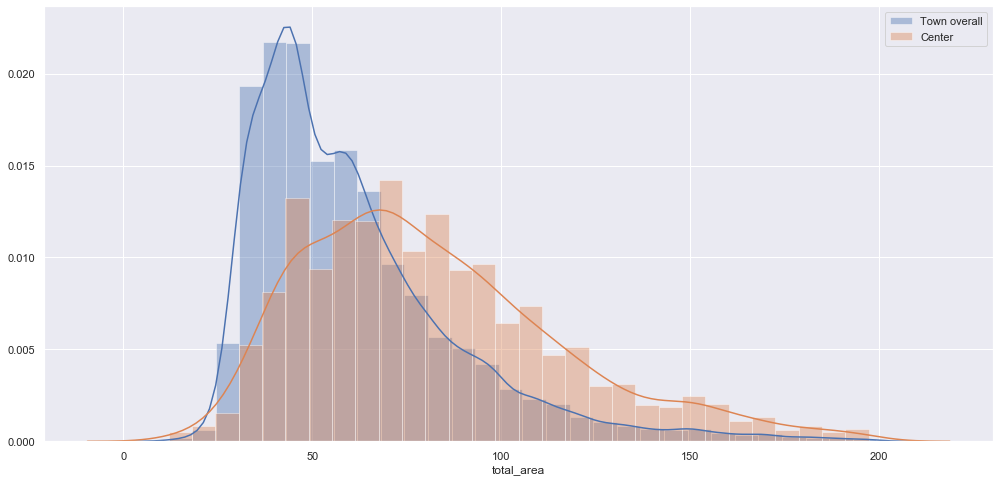

In [111]:
# посмотрим по общей площади
plot_center_change('total_area')

Видно, что в центре предложения недвижимости более большие по общей площади. 

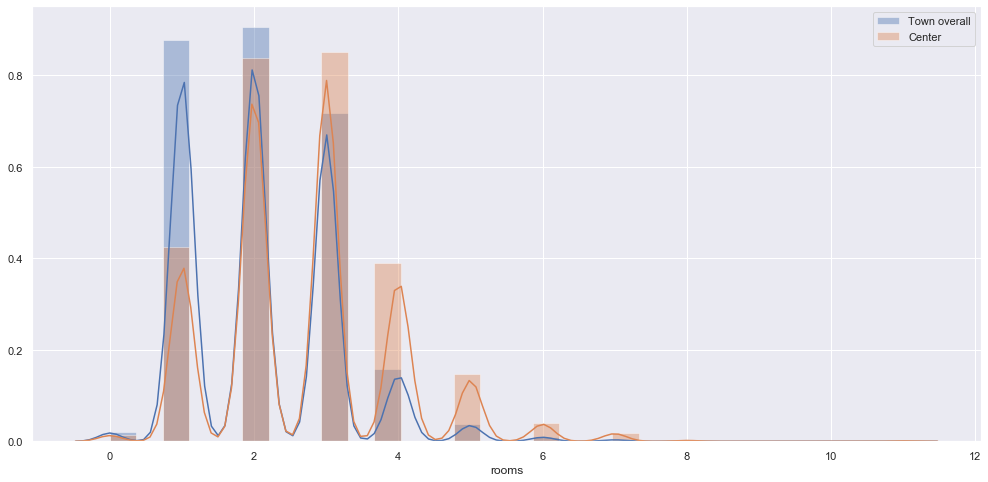

In [112]:
plot_center_change('rooms')

В центре довольно мало однокомнатных квартир. В основном 2 и 3. Хотя в целом по городу, однушки и двушки занимают лидерство.

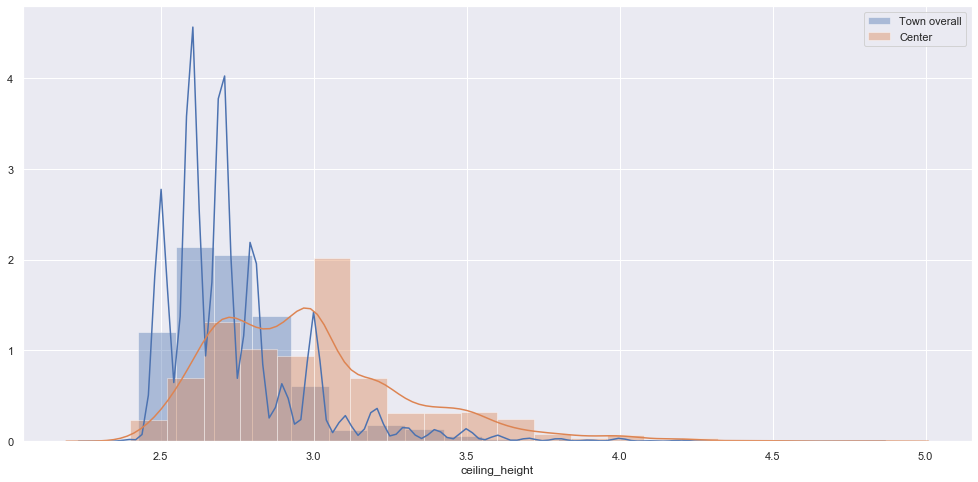

In [113]:
plot_center_change('ceiling_height', 20)

По городу потолки в основном ниже 3х метров. А вот в центре очень много высоченных потолков!

In [115]:
# посмотрим корреляцию значений для недвижимости в центре
data_spb_center[['last_price', 'rooms', 'floor', 'cityCenters_nearest']].corr()

,last_price,rooms,floor,cityCenters_nearest
last_price,1.000000,0.441997,0.196827,-0.059482
rooms,0.441997,1.000000,-0.054787,-0.174943
floor,0.196827,-0.054787,1.000000,0.215796
cityCenters_nearest,-0.059482,-0.174943,0.215796,1.000000


In [116]:
# и корреляцию для тех же значений по СПб в целом
data_spb[['last_price', 'rooms', 'floor', 'cityCenters_nearest']].corr()

,last_price,rooms,floor,cityCenters_nearest
last_price,1.000000,0.533951,0.027245,-0.407246
rooms,0.533951,1.000000,-0.167619,-0.259335
floor,0.027245,-0.167619,1.000000,0.224732
cityCenters_nearest,-0.407246,-0.259335,0.224732,1.000000


In [117]:
# напишем функцию для визуализации влияния параметров жилья на цену
# график зависимости средней цены от группировки по задаваемому параметру другого столбца, рисуем линию
# лучше всего она подойдёт для более-менее категориальных переменных(что нам и нужно)
def price_corr_spb(col):
    ax = (data_spb # график для города
     .pivot_table(index=col, values='last_price', aggfunc='mean') # берём среднее по колонке
     .reset_index()
     .plot(x=col, 
           y='last_price', 
           kind='line', 
           figsize=(15,5), 
           label='Town overall', 
           title='Зависимость средней цены от значений {}'.format(col)
          ) 
    )
    (data_spb_center # график для центра
     .pivot_table(index=col, values='last_price', aggfunc='mean')
     .reset_index()
     .plot(ax=ax, x=col, y='last_price', kind='line', label='Center')
    )
    ax.set_ylabel("mean_price")
    plt.show()

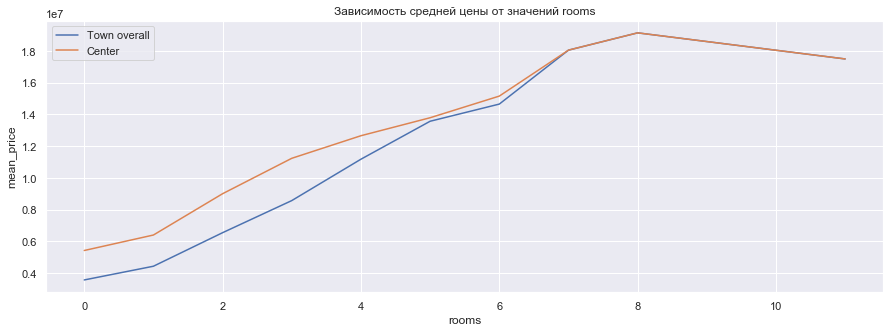

In [118]:
price_corr_spb('rooms')

Интересно, что разница стоимости для квартир с 5ю комнатами и выше практически нивелируется.

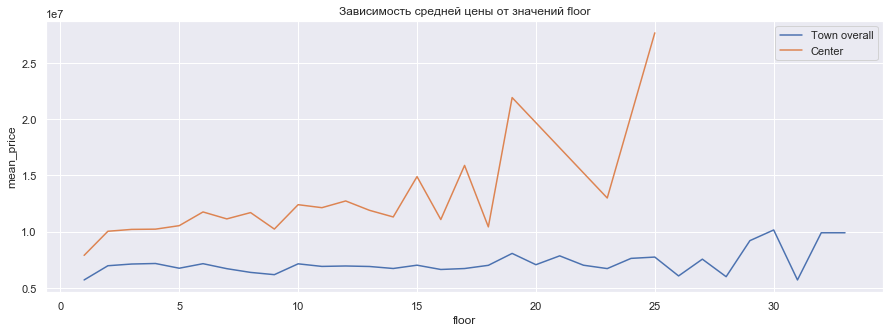

In [119]:
price_corr_spb('floor')

Первый этаж не в почёте как в центре, так и в городе в целом. Причём рост цены между 1 и 2 этаже для центра "круче".

Также видно, что в целом по городу, высота этажа не сильно то влияет на цену. Выше 25 этажа цены колеблятся, но в таких небоскрёбах действительно может быть как обычное, так и элитное жильё.
А вот в центре, рост цены от высоты этажа очевиден. Особенно после 10 этажа. За панорамный вид на питер стоит просить больше, это точно!

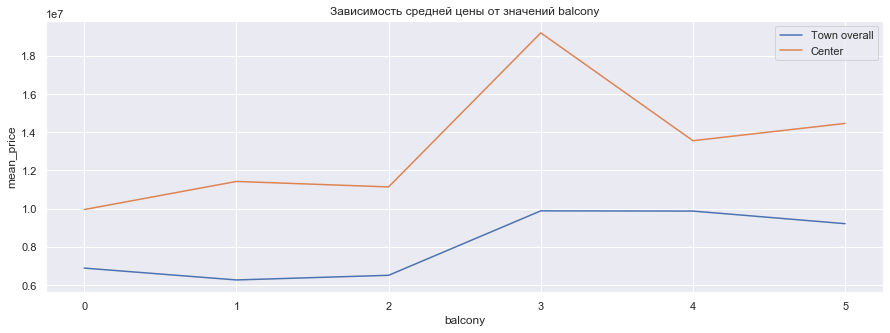

In [120]:
price_corr_spb('balcony')

В центре и за балконы просят деньги!

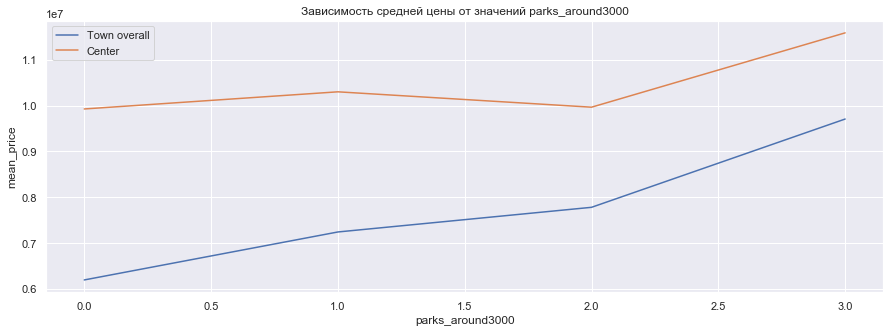

In [121]:
price_corr_spb('parks_around3000')

А вот количество парков в центре на цену особо не влияет. Оно и понятно - столько всего вокруг!
Зато в целом в городе наличие парков рядом повышает стоимость.

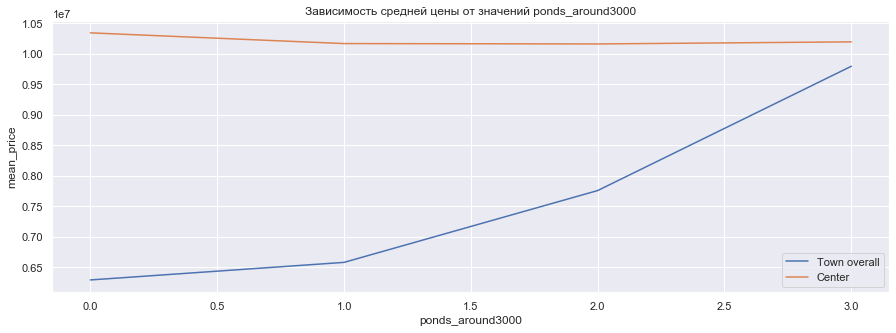

In [122]:
price_corr_spb('ponds_around3000')

А вот с прудами ещё интереснее!
В центре к ним относятся индифирентно. Ещё бы, сплошные каналы и Нева рядом.
А вот в целом по городу наличие прудов ценится. Люди в питере любят селится у воды))

#### Выводы:
1. Зависимость цены от кол-ва комнат сравнимы для центра и города. Правда в центре кол-во комнат чуть меньше влияет на цену.
2. Этаж практически не влияет на цену по городу, однако оказывает влияние на цену в центре. Это интересно, хотя объяснимо. В центре на нижних этажах шумно, поэтому с ростом этажа растёт и цена. Да и вид хороший!
3. Удалённость от центра существенно влияет на цену (обратно) по городу. Но на цену в центре не влияет - оно и понятно, они уже в центре)) 
4. Наличие балконов ценится в центре больше, чем в целом по городу.
5. Наличие парков и прудов поблизости в центре практически не влияет на цену. А вот в целом по городу, стоимость недвижимости в "зелёных" районах выше.

### Шаг 5. Общий вывод

В качестве исходных данных была выгрузка объявлений о продажи недвижимости с сервиса Яндекс.Недвижимость.

Была проведена предобработка данных: выявлены пропущенные значения, проведён анализ распределения значений данных. Данные были нормированы и форматированы для дальнейшего исследования.
Были обранужены выбросы в данных, объяснены их возможные причины. Где это было целесообразно, данные с выбросами были отброшены.
В результате получилось 23117 объявлений, которые были проанализированы.

Частные выводы по результатам анализа:
1. Изучена зависимость цены недвижимости от различных параметров. Наибольшая зависимость цены выявлена от:
    * площади недвижимости, коэф. Пирсона для общей площади r = 0.789608
    * количества комнат, r = 0.498638
    * высота потолков, r = 0.405835
    * удалённости от центра, r = -0.329430
    * наличия парков рядом, r = 0.281171

2. Изучена зависимость цены недвижимости от даты публикации объявления. Установлено, что обявления, размещённые на выходных в среднем с мерьшей ценой. Также было обнаружено общее падение рынка цен недвижимости после кризиса 2014 года.

3. Были выявлены топ10 городов по объявлениям и проанализирована стоимость жилья в этих городах. Установлено, что самый дорогой город для проживания - северная столица СПб. Самое дешёвое жильё в Выборге.

4. Более детально были изучены объявления в Санкт-Петербурге. Установлено расстояние от центра города, где цены на недвижимость наиболее высоко оценены. Получился R = 7 км. 
Для центральной зоны были изучены параметры(этаж, кол-во комнат, и тд.), а также оценено их влияние на цену.

5. Проведён анализ влияния различных параметров квартиры на стоимость жилья, в сравнении для Санкт-Петербурга и только центра города. Можно сделать интересные выводы:
    * В центральном округе на стоимость влияет этаж квартиры (чем выше-тем вы стоимость), а также наличие балконов. При этом наличие парков, прудов и расстояние до центра практически на влияет на цену.
    * А по городу в целом, наличие парков и прудов ценится. Так же ценится приближенность к центру. А вот этаж квартиры и наличие балконо практически на цену не влияют.
    Таким образом можно сделать вывод, степень влияния дополнительных параметров продаваемой недвижимости могут различаться для разных районов города.